In [1]:
push!(LOAD_PATH,pwd())
using ProfileView
using constants
using types10
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

kltSA (generic function with 1 method)

In [2]:
Eoff=5.0
Ts=collect(300.0:10.0:900.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.8e18]#,-1.22e18,-1.02e18,-0.94e18]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
numofnn=[1e17]#,1e18,1e18,1e18]
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.6]#,0.8,0.7,0.61]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1(var)=0.0#EX1(var0)
alphaX3(var)=0.0#EX1(var0)
alphaLH(var)=0.0#EX3(var0)
alphaHH(var)=0.0#EX3(var0)

function Da(band::parBandTx,x::Float64)
    Da=7.0#9.0-1.5*x*x
    Dv=1.0
    if band==bandX3 ||  band==bandX1
        return Da
    end
    if band==bandHH ||  band==bandLH
        return Dv
    end
end

bandX3=parBandTx(true,1.0,effMassX3(var0),alphaX3(0.0),EX3(var0),[EX3],[effMassX3],[alphaX3],var0)
bandX1=parBandTx(true,1.0,effMassX1(var0),alphaX1(0.0),EX1(var0),[EX1],[effMassX1],[alphaX1],var0)
bandHH=parBandTx(true,1.0,effMassHH(var0),alphaHH(0.0),EHH(var0),[EHH],[effMassHH],[alphaHH],var0)
bandLH=parBandTx(true,1.0,effMassLH(var0),alphaLH(0.0),ELH(var0),[ELH],[effMassLH],[alphaLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#
#bndstTx=BandStrucTx([bandLH,bandX1],var0)#

#vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandV]
vartau0=[bandX3.effMass,Ts[1],EX1(var0),xs[1],EX1(var0),bandX3,numofn[1]*1e6,bndstTx,numofnn[1]*1e6,bandLH]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
#tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauAC(var)=tauAC_func(Cl(var[4]),Da(var[6],var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2lowN_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauPOP3(var)=tauPOP3_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(epsilon0_x(var[4]),var[1],var[9])
tauTOTTx=tau_electron_B([tauAC,tauII2,tauNI,tauPOP3],vartau0)#,tauII2,tauPOP2,tauPOP3

xmax=3.0

3.0

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis,sigmaes,sigmahs,seebeckes,seebeckhs)=electronicPropsiso(bndstTx,xs,Ts,numofn,numofnn,tauTOTTx,xmax)
x=3.0

 40.148168 seconds (189.11 M allocations: 39.005 GiB, 10.60% gc time)


3.0

In [4]:
foreach(x->println(Ts[x]," ",Efs[x,1,1,]-Eoff),1:length(Ts))

300.0 -0.06224130240818759
310.0 -0.06599681084743647
320.0 -0.06981489525072071
330.0 -0.07369312204260492
340.0 -0.07762870588846482
350.0 -0.08161824094221615
360.0 -0.08565729979396064
370.0 -0.08973985583733946
380.0 -0.0938574824486107
390.0 -0.09799829163301421
400.0 -0.10214560756318125
410.0 -0.10627644411279569
420.0 -0.1103599886525215
430.0 -0.11435649094729428
440.0 -0.11821717224080874
450.0 -0.12188587510286997
460.0 -0.12530295977970507
470.0 -0.12841126568122352
480.0 -0.13116295743879736
490.0 -0.1335253435568129
500.0 -0.13548392013559418
510.0 -0.13704198366920028
520.0 -0.1382174722644276
530.0 -0.1390384399579263
540.0 -0.13953852799234046
550.0 -0.1397532661819323
560.0 -0.13971738247594345
570.0 -0.13946332007031437
580.0 -0.13902041113247865
590.0 -0.1384146162590678
600.0 -0.13766858831673545
610.0 -0.13680191171396316
620.0 -0.13583142025033457
630.0 -0.13477153529277253
640.0 -0.13363459200720307
650.0 -0.13243113771732595
660.0 -0.13117019617693249
670.0 -0

In [5]:
bndstTx2=BandStrucTx([bandX1],var0)#
NumofnMultiBand2(bndstTx2,-0.083575+5.0,716.975,3.0)*1e-6

-4.73981776139202e18

In [6]:
bndstTx.var[1]=716.975
types10.updatebnstTx(bndstTx) 
println("meff ",bndstTx.bands[2].effMass," offset ",bndstTx.bands[2].offset)
getDOS_SingleBand_E(bndstTx.bands[2],bndstTx.bands[2].offset+1.0)

meff -1.366407534e-30 offset 4.6951678


0.0

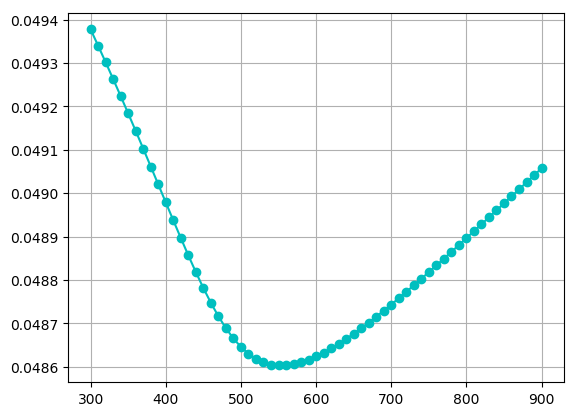

In [7]:
plot(Ts,Efs[:,1,1]/100,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

In [8]:
foreach(x->println(Ts[x]," EC ",sigmaes[x,1,1]," SC ",seebecks[x,1,1]*1e6),1:length(Ts))

300.0 EC 4756.498193334977 SC -425.7399391872783
310.0 EC 4577.589722640821 SC -431.74075544333004
320.0 EC 4409.130497371123 SC -437.53707934059685
330.0 EC 4250.370180466069 SC -443.12316180457884
340.0 EC 4100.682374678881 SC -448.48513795534456
350.0 EC 3959.5770841349117 SC -453.59636520036025
360.0 EC 3826.721463633017 SC -458.41097407320035
370.0 EC 3701.970176168974 SC -462.85524517401325
380.0 EC 3585.40615785258 SC -466.81661065883026
390.0 EC 3477.3914429787105 SC -470.13056879356014
400.0 EC 3378.6255067630136 SC -472.5668199576655
410.0 EC 3290.20485560591 SC -473.8177359999818
420.0 EC 3214.529946018014 SC -473.46280149342965
430.0 EC 3152.997018750196 SC -471.06850737468244
440.0 EC 3107.8425954092454 SC -466.16115755905946
450.0 EC 3081.939825196788 SC -458.3025259046508
460.0 EC 3078.204711440818 SC -447.2048524708107
470.0 EC 3099.414563310521 SC -432.82820175058225
480.0 EC 3147.967931170836 SC -415.4392124697113
490.0 EC 3225.704347376358 SC -395.5957066276416
500.0

In [9]:
x=3
y= x==3 & x>0 ? x+1 : x-1

4

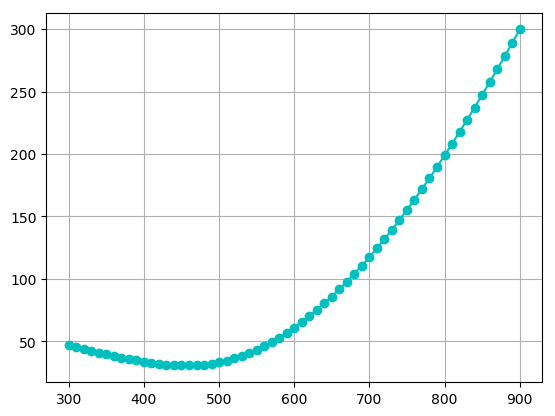

In [10]:
plot(Ts,sigmaes[:,1,1]/100,linestyle="-",marker="o",color="c")
#ylim(0,7)
grid()

In [11]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

In [12]:
200*kBe*720

12.408958656000001

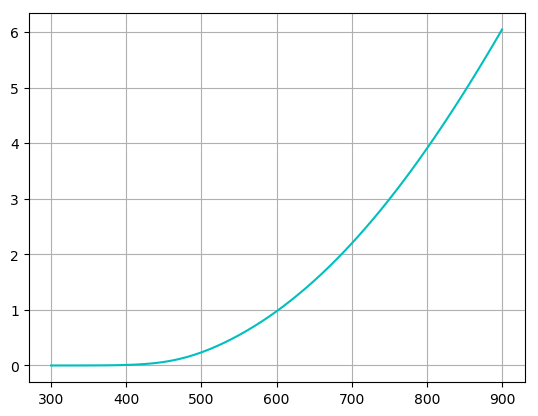

In [13]:
plot(Ts,kbis[:,1,1],linestyle="-",color="c")
#ylim(0,7)
grid()

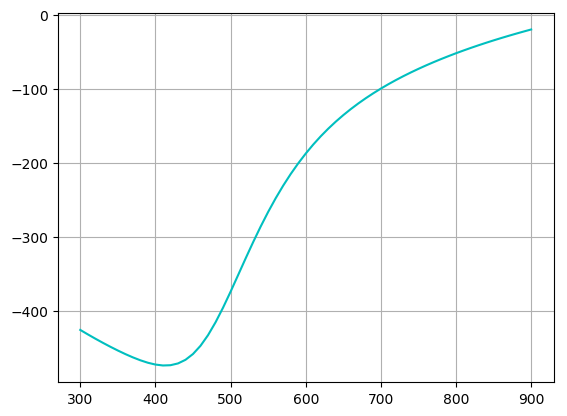

In [37]:
plot(Ts,seebecks[:,1,1]*1e6,linestyle="-",color="c")
#plot(Ts,seebeckes[:,1,1]*1e6,linestyle="-",color="y")
#plot(Ts,seebeckhs[:,1,1]*1e6,linestyle="-",color="k")
#ylim(-250,-0)
grid()

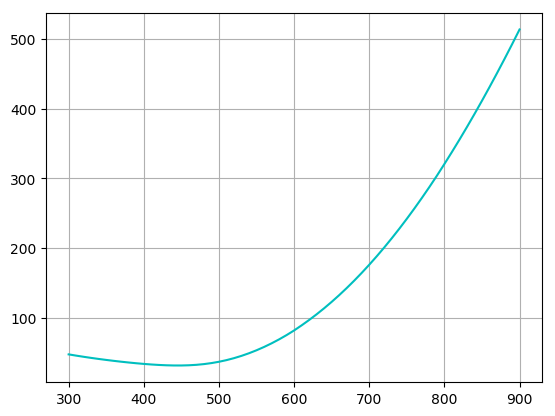

In [15]:
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="c")
#ylim(0,3500)
grid()

In [16]:
T_EF_Dict=Dict()
for (Ti,Tx) in enumerate(Ts)
    T_EF_Dict[Tx]=(Efs[Ti])    
end
T_EF_Dict_Array=Array{Dict{Float64,Float64},2}(undef,length(numofn),length(xs))
Dict_temp=Dict()
Efsr=Array{Float64,3}(undef,length(Ts),length(numofn),length(xs))
for (j,jn) in enumerate(numofn)
    for (k,kx) in enumerate(xs) 
        for (i,iT) in enumerate(Ts)
            Efsr[i,j,k]=Efs[i,j,k]-EX3(0.0)
            Dict_temp[iT]=Efsr[i,j,k]
            T_EF_Dict_Array[j,k]=Dict_temp 
        end
    end
end
#foreach(i->println("$i= ",Ts[i]),1:length(Ts))
#Efsr

In [17]:
#println("-1")
#############Lattice Thermal Conductivity Parameters###############

function klpar(con::Float64,p::Float64,NP::Float64)
    thetaL=52.3e12*hbar/kB # K 
    thetaT=29.7e12*hbar/kB  # K
    vL=(1-con)*7700+con*4900    # m/s
    vT=(1-con)*4900+con*3000    # m/s
    gammaL=2.5*(1-con)+1.7*con
    gammaT=2.5*(1-con)+1.7*con
    M=(2*(24.305e-3)+(28.0855e-3*(1-con)+118.71e-3*con))/3/Nav
    V=((1-con)*(6.39e-10)^3+con*(6.77e-10)^3)/12
    a=V^(1.0/3.0)
    ro=M/V
    Vdj=(((6.39e-10)^3)/((1-con)*(6.39e-10)^3+con*(6.77e-10)^3))^(1/3)
    jL=vL/7700*Vdj
    jT=vT/4900*Vdj
    thetaLx=thetaL*jL
    thetaTx=thetaT*jT
    ##########Boundary Scattering###############3
    D=11e-9
    #p=1.0
    ##########Alloy Scattering###################
    mbar=(28.0855*(1-con)+118.71*con)
    GammaSiSn=(1-con)*((28.0855-mbar)/mbar)^2+con*((118.71-mbar)/mbar)^2
    GammaMgSiSn=2*((mbar/(24.305+mbar))^2*GammaSiSn);         
    ##########Electron Scattering###################
    Eep=5.0*q
    xsp=xs[1]
    Tp=300.0
    mdx1=0.67*me
    mdx3=0.38*me
    Efx3=0.2589
    Efx1=0.2589
    ##########Nanoparticle Scattering###################
    #NP=0
    #alpha=1.0
    Rnp=1/2*15.0e-9#
    Vnp=4/3*pi*(Rnp)^3
    rhonp=NP/100/Vnp
    rhoM=3.0
    rhoT=3.78
    alphaNP=0.2289#1-exp(-1*(rhoT-rhoM)/rhoM);
#vartauPH0=[[0.02],Ts[1],gammaL,gammaT,xsp,thetaCLx,thetaCTx,thetaCTx,MSi,MGe,VSi,a,T_EF_Dict,0.0]
    Tsindex=1#25
    numberofnindex=1
    xsindex=1
    vartauPH0=[ [0.02],  Ts[1],   gammaL,  gammaT, con,#5
        thetaLx, thetaTx, thetaTx, M,   M, #10
        V, a, T_EF_Dict_Array, Eep, alphaNP, #15
        Rnp, thetaLx, thetaTx, vL, vT, #20
        vL, vT, p, NP,Tsindex,#25
        numberofnindex,xsindex,p,D,GammaMgSiSn,#30
        mdx1,mdx3,Efx1,Efx3,ro,#35,
        NP,alphaNP,Rnp,Vnp,rhonp #40
        ]  
    thetaCLx=thetaCL(vartauPH0[12],vartauPH0[5],vartauPH0[17],vartauPH0[19],vartauPH0[11])
    thetaCTx=thetaCT(vartauPH0[12],vartauPH0[5],vartauPH0[18],vartauPH0[19],vartauPH0[11])
    #println("2")
    tauPHNLf(var)=tauPH_NL(var[3],var[11],var[1],var[2],var[9],var[21])
    tauPHNTf(var)=tauPH_NT(var[4],var[11],var[1],var[2],var[9],var[22]) 

    tauPHULf(var)=tauPH_U(var[3],var[1],var[2],var[9],var[19],var[17])
    tauPHUTf(var)=tauPH_U(var[4],var[1],var[2],var[9],var[20],var[18])

    tauPHALLLf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[19])
    tauPHALLTf(var)=tauPH_ALL(var[30],var[11],var[1],var[2],var[20])

    tauPHeLfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[21])
    tauPHeTfX3(var)=tauPH_e(var[14],var[32],var[35],(var[13][var[26],var[27]])[var[2]],var[1],var[2],var[22])

    tauPHeLfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[21])
    tauPHeTfX1(var)=tauPH_e(var[14],X1effMass(var[2])*me,var[35],(var[13][var[26],var[27]])[var[2]]-Ec0(0.6)
        ,var[1],var[2],var[22])

    tauPHBLf(var)=tauPH_B(var[19],var[28],var[29])
    tauPHBTf(var)=tauPH_B(var[20],var[28],var[29])
    #println("3")

    tauPHNPLf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[19])
    tauPHNPTf(var)=tauPH_NP(var[37],var[40],var[38],var[1],var[2],var[20])

    tauPHTOTL=tau_phonon_B([tauPHNLf,tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0)#,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPH_eLf ,tauPHALLLf ,tauPHBLf,,tauPHULf
    tauPHNL=tau_phonon_B([tauPHNLf],vartauPH0)
    tauPHRL=tau_phonon_B([tauPHULf,tauPHBLf,tauPHALLLf,tauPHeLfX3,tauPHeLfX1,tauPHNPLf],vartauPH0) #,tauPHNPLf,tauPHALLLf,tauPHeLf,tauPHALLLf,tauPH_eLf] ,tauPHBLf

    tauPHTOTTx=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf
    tauPHNTx=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTx=tau_phonon_B([tauPHUTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHBTf,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf ,tauPHBTf#

    tauPHTOTTy=tau_phonon_B([tauPHNTf,tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPHeTf,tauPHALLTf,tauPH_eTf tauPHBTf
    tauPHNTy=tau_phonon_B([tauPHNTf],vartauPH0)
    tauPHRTy=tau_phonon_B([tauPHUTf,tauPHBTf,tauPHALLTf,tauPHeTfX3,tauPHeTfX1,tauPHNPTf],vartauPH0) #,tauPHNPTf,tauPHALLTf,tauPH_eTf ,tauPHBTf,tauPHALLTf,tauPHeTf
    #println("4")
    tauPHL=[tauPHTOTL,tauPHNL,tauPHRL]
    tauPHTx=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    tauPHTy=[tauPHTOTTx,tauPHNTx,tauPHRTx]
    return (vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)
end
xmax=1.0

1.0

In [52]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.6,0.65,0.0)
klsM=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,klsM[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,
        tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(klsM[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [53]:
foreach(x->println(klsM[x,1,1]),1:length(Ts))

0.8543447097971745
0.8375993922211911
0.8214980929752786
0.8060303873434091
0.7911833098958178
0.7769418792363069
0.7632895273803785
0.7502084588145802
0.7376799559939548
0.7256846424075071
0.7142027106595435
0.7032141207097798
0.692698772048082
0.682636652802861
0.67300796829938
0.663793251134185
0.6549734542347697
0.6465300276529115
0.638444979307831
0.6307009199820476
0.6232810936851387
0.6161693955594844
0.6093503800980645
0.6028092622703444
0.5965319134870325
0.590504853594055
0.5847152394442054
0.5791508509645232
0.5738000746495533
0.5686518851417676
0.5636958252592535
0.558921984868068
0.5543209789671144
0.5498839253132589
0.5456024218697607
0.5414685243163003
0.5374747238168104
0.5336139252031876
0.5298794256994507
0.5262648942819311
0.5227643517463799
0.51937215153212
0.5160829613360081
0.5128917455347015
0.5097937484220011
0.5067844782586058
0.5038596921240545
0.5010153815547026
0.49824775894699164
0.495553244701827
0.4929284550833872
0.49037019076395355
0.4878754260252845
0.

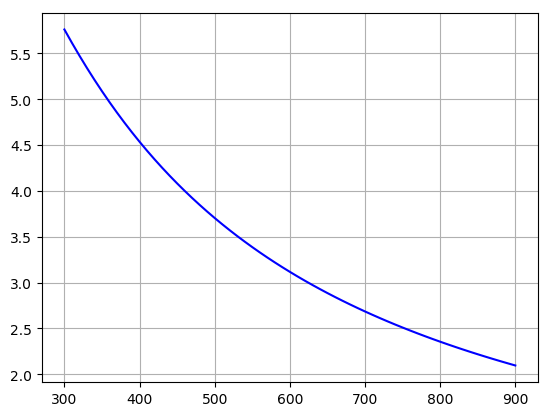

In [48]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
grid()

In [54]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(0.0,0.65,0.0)
kls0=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls0[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
    #println("T=", iTx, " kl= " ,round(kls0[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [ ]:
foreach(x->println(kls0[x,1,1]),1:length(Ts))

In [55]:
(vartauPH0,tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,tauPHL,tauPHTx,tauPHTy)=klpar(1.0,0.5,0.0)
kls1=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
for (iT,iTx) in enumerate(Ts)    
   (IL1,ITx1,IL2,ITx2,IL3,ITx3,kL,kTx,kTy,kls1[iT,1,1])= klt(tauPHTOTL,tauPHNL,tauPHRL,tauPHTOTTx,tauPHNTx,tauPHRTx,tauPHTOTTy,tauPHNTy,tauPHRTy,iTx,[vartauPH0[21],vartauPH0[22],vartauPH0[22]])
   # println("T=", iTx, " kl= " ,round(kls1[iT,1,1]*10000)/10000)
   # println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [56]:
foreach(x->println(kls1[x,1,1]),1:length(Ts))

3.326492140261184
3.274343791422957
3.223522375567992
3.1740119694671733
3.1257908176360356
3.0788328806799075
3.033109044201725
2.9885880630126445
2.9452372980227963
2.9030232901393753
2.86191220566896
2.821870180332937
2.7828635834931004
2.744859220097909
2.7078244847542745
2.6717274796835038
2.636537105570954
2.6022231311546715
2.568756244188233
2.5361080842470254
2.5042512576862768
2.4731593366241977
2.442806845629138
2.4131692404698466
2.384222882682265
2.3559450123738306
2.3283137199357786
2.301307918649505
2.2749073167497267
2.2490923897972066
2.2238443532455117
2.199145135271536
2.1749773499598817
2.1513242709386105
2.12816980555962
2.105498469705703
2.08329536329163
2.0615461465111005
2.0402370168667745
2.019354687007439
1.9988863633850718
1.9788197257351967
1.9591429073761584
1.939844476316878
1.9209134171577735
1.9023391137658605
1.884111332702241
1.8662202073782632
1.8486562229151817
1.8314102016813603
1.814473289480607
1.7978369423650815
1.7814929140464244
1.76543324387905

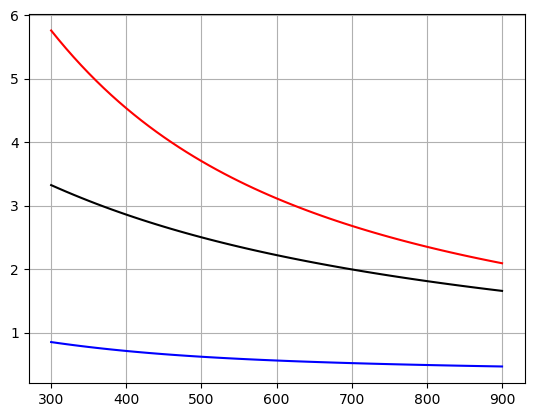

In [57]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
plot(Ts,kls0[:,1,1],linestyle="-",color="r")

plot(Ts,kls1[:,1,1],linestyle="-",color="k")
grid()

In [21]:
yaa=0.6
aMgSi=6.39e-10
aMgSn=6.77e-10

6.77e-10

In [61]:
ks=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
klsT=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
f=0.6
for (iT,iTx) in enumerate(Ts)  
    klsT[iT,1,1]=(1-f)*klsM[iT,1,1]+f*(kls1[iT,1,1]*(1-yaa)aMgSn^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3)+kls0[iT,1,1]*(yaa)aMgSi^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3))
       ks[iT,1,1]=klsT[iT,1,1]+kes[iT,1,1]+kbis[iT,1,1,] 
    #println("T=", iTx, " kl= " ,round(klsT[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

In [68]:
klsT4=Array{Float64}(undef,length(Ts),length(numofn),length(xs))
f=0.1
for (iT,iTx) in enumerate(Ts)  
    klsT4[iT,1,1]=(1-f)*klsM[iT,1,1]+f*(kls1[iT,1,1]*(1-yaa)aMgSn^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3)+kls0[iT,1,1]*(yaa)aMgSi^3/((1-yaa)*aMgSn^3+yaa*aMgSi^3))
       
    #println("T=", iTx, " kl= " ,round(klsT[iT,1,1]*10000)/10000)
    #println("IL1= ",IL1," IL2= ",IL2," IL3= ",IL3," ITx1= ",ITx1," ITx2= ",ITx2," ITx3= ",ITx3," kL/3=",kL,    " kTx/3=",kTx," kTy/3=",kTy)
end

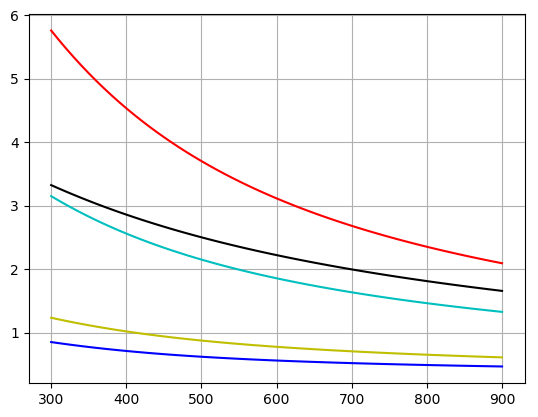

In [69]:
plot(Ts,klsM[:,1,1],linestyle="-",color="b")
plot(Ts,kls0[:,1,1],linestyle="-",color="r")
plot(Ts,klsT[:,1,1],linestyle="-",color="c")
plot(Ts,klsT4[:,1,1],linestyle="-",color="y")
plot(Ts,kls1[:,1,1],linestyle="-",color="k")
grid()

In [23]:
MgSn_KL_T=[303.381209787804   ,404.509621648526   ,508.944674606021   ,609.64854815216    ,715.169193157614]
MgSn_KL_K=[ 7.16256157635468, 5.26108374384236, 4.14778325123153, 3.38916256157635, 2.89655172413793]

5-element Array{Float64,1}:
 7.16256157635468
 5.26108374384236
 4.14778325123153
 3.38916256157635
 2.89655172413793

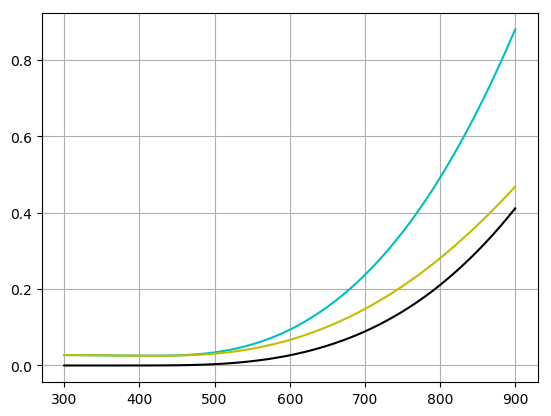

In [24]:
figure()
#plot(Ts,klsT[:,1,1],linestyle="-",color="c")
#plot(Ts,klsT[:,1,1]+kes[:,1,1],linestyle="-",color="b")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
plot(Ts,kes[:,1,1],linestyle="-",color="c")
plot(Ts,kees[:,1,1],linestyle="-",color="y")
plot(Ts,kehs[:,1,1],linestyle="-",color="k")
#plot(Ts,kls0[:,1,1],linestyle="-",color="k")
#plot(Ts,kls1[:,1,1],linestyle="-",color="y")
#plot(MgSn_KL_T,MgSn_KL_K,linestyle="None",marker="o",markersize=7,color="c")
#ylim(0,10)

grid()

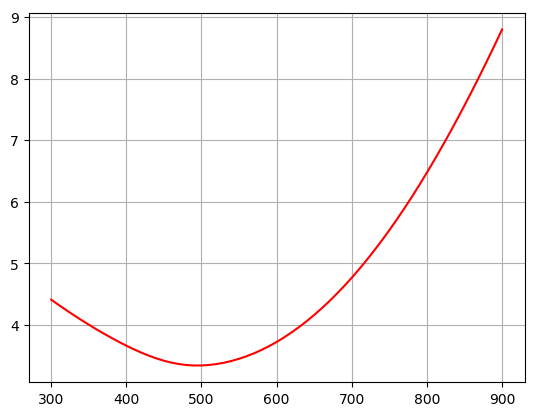

In [25]:
figure()
#semilogy(Ts,kls[:,1,1],linestyle="-",color="c")
#plot(Ts,kls0[:,1,1],linestyle="-",color="b")
#plot(Ts,kls1[:,1,1],linestyle="-",color="c")
#plot(Ts,klsM[:,1,1],linestyle="-",color="k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#ylim(0,4.5)
grid(true)
#kes,kees,kehs,kbis

In [26]:
MgSiSn4hECE=[10,12.4,20.5,35.8,43.2,69.6,82.8,100,110]
MgSiSn2hECE=[3,4.4,8.5,15.8,22.2,55.6,50.8,68,80]
MgSiSn1hECE=[2,4.2,3.7,11.8,22.2,25.6,30.8,48,64]
MgSiSn0hECE=[1.6,1.7,3.8,7.8,12.2,25.6,40.8,68,62]

9-element Array{Float64,1}:
  1.6
  1.7
  3.8
  7.8
 12.2
 25.6
 40.8
 68.0
 62.0

In [27]:
MgSiSn4hKCT=[27.204980536447565,125.22263104569937,250.3986028902043, 300.61256865568174,350.4225990508186, 400.31661600810537,
450.60323681544304,500.88852450274595,550.37460672959,]
MgSiSn4hKCK=[ 2.8789473684210525, 2.7375, 2.609210526315789, 2.5121710526315786, 2.4184210526315786, 2.531907894736842, 2.614144736842105
, 2.6930921052631573, 2.7999999999999994]
MgSiSn2hKCT=[27.174994546327184, 125.66321921825845, 250.56521889830958, 300.8030294412153, 350.04276302458277,400.3366068836394, 
450.6409643790327, 500.95101524496823,550.7594666065552]
MgSiSn2hKCK=[2.608956937799043, 2.4846513157894736, 2.4523355263157893, 2.3861330409356722, 2.3131756578947367
, 2.385235380116959, 2.4832374999999995, 2.595288011695906, 2.697641746411483]
MgSiSn05hKCT=[26.1867119039,124.6184700145,249.7991072943,300.1809590466,349.8324946796,399.3641637338,450.1016014407,
450.7811561579,549.7232004091,500.4092678505]
MgSiSn05hKCK=[2.4217028509,2.3627326555,2.2459551435,2.1025076754,2.0223385167,2.2370652412,2.3803594498,2.302875,
2.5966549043,2.5105263158]
MgSiSn2h2TiO2KCT=[450.7811561579,26.5677491601,125.429931211,250.6172345758,300.4185996907,350.6278995361,
400.1639737642,500.3759398496,550.2639577668]
MgSiSn2h2TiO2KCK=[2.302875,2.3065789474,2.2490131579,2.1486842105,2.0335526316,1.925,2.1552631579,2.4282894737,
2.5269736842]
MgSiSn2h5TiO2KCT=[27.3549565403,124.5907321495,250.1753052845,299.9806697595,350.1926358449,400.1339785634,
450.0339945609,500.3299472084,550.6152348958]
MgSiSn2h5TiO2KCK=[2.2490131579,2.1782894737,2.0582236842,1.9529605263,1.8509868421,2.08125,2.2095394737,2.3148026316,
2.39375]
MgSiSn0hKCT=[26.9755694846,125.1437396683,250.3474884019,300.0735322348,349.8027683571,400.6191835973,449.916314723,
500.2366154749,550.052698235]
MgSiSn0hKCK=[2.1168755981,2.0268355263,1.9150855263,1.8140986842,1.7209888158,1.8544934211,1.9231644737,2.0605065789,
2.1816907895]

9-element Array{Float64,1}:
 2.1168755981
 2.0268355263
 1.9150855263
 1.8140986842
 1.7209888158
 1.8544934211
 1.9231644737
 2.0605065789
 2.1816907895

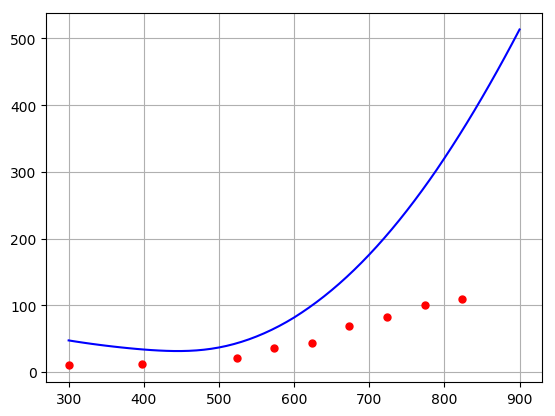

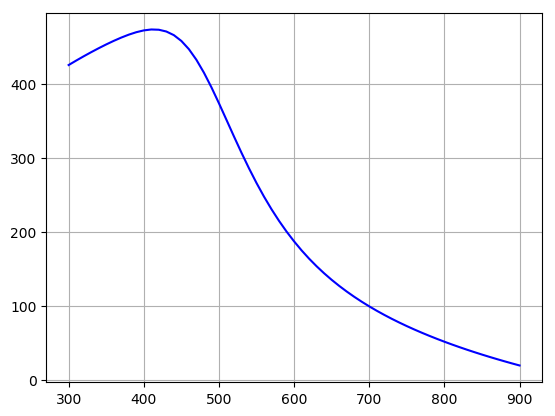

In [28]:

figure()
plot(Ts,sigmas[:,1,1]/100,linestyle="-",color="b")
#plot(Ts,sigmas[:,2,2]/100/6^(2/3),linestyle="-",color="r")
#plot(Ts,sigmas[:,3,3]/100/6^(2/3),linestyle="-",color="k")
#plot(Ts,sigmas[:,4,4]/100/6^(2/3),linestyle="-",color="g")
plot(MgSiSn4hKCT .+273,MgSiSn4hECE,linestyle="None",marker=".",markersize=10,color="r")
#plot(MgSiSn4hKCT .+273,MgSiSn2hECE,linestyle="None",marker=".",markersize=10,color="k")
#plot(MgSiSn4hKCT .+273,MgSiSn1hECE,linestyle="None",marker=".",markersize=10,color="b")
#plot(MgSiSn4hKCT .+273,MgSiSn0hECE,linestyle="None",marker=".",markersize=10,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Green_EC_E/100,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Blue_EC_E/100,linestyle="None",marker="o",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Pink_EC_E/100,linestyle="None",marker="o",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,SiGe_Suin_Black_EC_E/100,linestyle="None",marker="o",markersize=2,color="k")
grid()

figure()
plot(Ts,-seebecks[:,1,1]*1e6,linestyle="-",color="b")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="r")
#plot(Ts,-seebecks[:,3,3]*1e6,linestyle="-",color="k")
#plot(Ts,-seebecks[:,4,4]*1e6,linestyle="-",color="g")
#plot(Ts,-seebecks[:,2,2]*1e6,linestyle="-",color="b")
#plot(SiGe_Vin_162_Bulk_SC_T,SiGe_Vin_162_Bulk_SC_S,linestyle="None",marker=".",markersize=10,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Green_SC_S,linestyle="None",marker="x",markersize=2,color="g")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Blue_SC_S,linestyle="None",marker="x",markersize=2,color="b")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Pink_SC_S,linestyle="None",marker="x",markersize=2,color="r")
#plot(SiGe_Suin_EC_T,-SiGe_Suin_Black_SC_S,linestyle="None",marker="x",markersize=2,color="k")
grid()

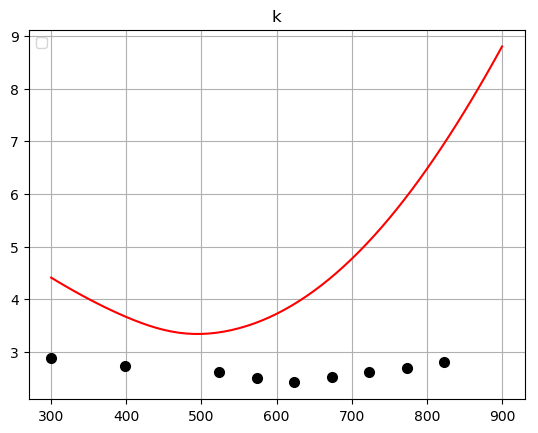

No handles with labels found to put in legend.


In [29]:
figure()
title("k")
plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
#plot(Ts,klsT[:,1,1]+kes[:,1,1]+kbis[:,1,1],linestyle="-",color="r")
plot(MgSiSn4hKCT .+273,MgSiSn4hKCK,linestyle="None",marker="o",markersize=7,color="k")
#plot(MgSiSn2hKCT .+273,MgSiSn2hKCK,linestyle="None",marker="^",markersize=7,color="b")
#plot(MgSiSn05hKCT .+273,MgSiSn05hKCK,linestyle="None",marker="D",markersize=7,color="g")
#plot(MgSiSn2h2TiO2KCT  .+273,MgSiSn2h2TiO2KCK,linestyle="None",marker="8",markersize=7,color="tab:pink")
#plot(MgSiSn2h5TiO2KCT .+273,MgSiSn2h5TiO2KCK,linestyle="None",marker="*",markersize=7,color="tab:purple")
#plot(MgSiSn0hKCT .+273,MgSiSn0hKCK,linestyle="None",marker="s",markersize=7,color="r",label="4 h")
#plot(SiGe_SA_162_Bulk_KC_T,SiGe_SA_162_Bulk_KC_KL,linestyle="None",marker="o",markersize=7,color="b")
#plot(SiGe_SA_162_Bulk_KC_T2,SiGe_SA_162_Bulk_KC_K2,linestyle="None",marker="o",markersize=7,color="g")
legend(loc="upper left")
#ylim(1.5,5.0)
grid()

In [30]:
Ts

61-element Array{Float64,1}:
 300.0
 310.0
 320.0
 330.0
 340.0
 350.0
 360.0
 370.0
 380.0
 390.0
 400.0
 410.0
 420.0
   ⋮  
 790.0
 800.0
 810.0
 820.0
 830.0
 840.0
 850.0
 860.0
 870.0
 880.0
 890.0
 900.0

In [31]:
foreach(x->println(ks[x,1,1]),1:length(Ts))

4.409514511394832
4.323511580406736
4.239862220672069
4.158607155872698
4.079779117749145
4.003415008854341
3.9295693114613526
3.8583293325370285
3.78983259621178
3.724286146463649
3.6619865232626116
3.6033375379921546
3.5488708750818962
3.499217426822069
3.455096019622808
3.4172564211501104
3.3863900255845536
3.3630378191263004
3.347519878405355
3.3399147097670117
3.3400959781064703
3.3478083865412316
3.3627512874432197
3.3846442060809325
3.413264015506633
3.448456786107155
3.4901324963870346
3.5382530799474985
3.592817929969981
3.6538509387796614
3.7213900774865953
3.796456551398899
3.877640011651001
3.9652872750161494
4.059522102370575
4.160403433337842
4.267967985868724
4.382238771732455
4.5032279009952045
4.63093786529155
4.765362319415381
4.9064866748869544
5.054288615313039
5.208738574768427
5.369800195079808
5.537430768012108
5.7115816644153075
5.892198750842034
6.079222793572475
6.272589849812119
6.473147174326914
6.67932356661364
6.891491024065806
7.109638196970817
7.33370878

In [32]:
foreach(x->println(sigmas[x,1,1]),1:length(Ts))

4756.527633863342
4577.652224285301
4409.257511369311
4250.618215532709
4101.149418463996
3960.4276098068176
3828.2233785287463
3704.547854136665
3589.71438275121
3484.4154206537946
3389.811627386439
3307.624911955504
3241.083095570883
3192.6250928040836
3165.7529438026177
3164.8037985933065
3194.288258318528
3258.6108790623307
3361.7189400200996
3506.827680854363
3696.299840765681
3931.690679753943
4213.909488966042
4543.424875028256
4920.453664108018
5345.103154153114
5817.4686868482895
6337.675653657874
6905.900359039423
7522.370216553437
8187.354175209512
8917.657452418025
9688.792333709025
10506.41555273893
11372.337779199552
12287.3396117439
13251.915697153374
14266.425046950952
15331.13835739098
16446.256434057737
17611.918496205628
18828.20651113592
20095.14790610106
21412.717640587645
22780.840070406455
24199.39079314284
25668.198552635567
27187.047226823757
28755.67789793083
30373.79099231561
32056.329958807226
33777.89458429547
35545.58286250997
37360.07763328581
39221.33306

In [33]:
foreach(x->println(-seebecks[x,1,1]*1e6),1:length(Ts))

425.7399391872783
431.74075544333004
437.53707934059685
443.12316180457884
448.48513795534456
453.59636520036025
458.41097407320035
462.85524517401325
466.81661065883026
470.13056879356014
472.5668199576655
473.8177359999818
473.46280149342965
471.06850737468244
466.16115755905946
458.3025259046508
447.2048524708107
432.82820175058225
415.4392124697113
395.5957066276416
374.0549567785721
351.6401167295135
329.1140689415728
307.0959617709374
286.02907347809173
266.1885864481598
247.71170906535076
230.6333970118313
214.92000756942937
200.49618871153737
187.26453331303372
175.05589472385066
163.8697958411515
153.57600362625115
144.07244781271288
135.27112073545047
127.09448726230089
119.47426100852232
112.35045652911634
105.67049199757605
99.38833237461942
93.46369009138914
87.8612963031313
82.55024825291405
77.50343243585817
72.69701957051704
68.11002540457709
63.72393055410983
59.522352471524584
55.4907629497699
51.60197019012273
47.868698816275284
44.273130417809575
40.80478500736348
3

In [34]:
foreach(x->println(kes[x,1,1]),1:length(Ts))

0.027264327457796896
0.02716434345072367
0.027035540086359583
0.026882798522080937
0.026710917238021076
0.026524910046750925
0.0263304204883862
0.02613428240279693
0.0259452561738198
0.02577496168854054
0.025639005946927734
0.025558256604600853
0.025567217684803197
0.02569642976868428
0.025987516599430986
0.02649239475604347
0.02726819297315875
0.02837484141536084
0.029871590781636537
0.031813786214191134
0.03425079307463605
0.03722544138383452
0.04077475272799194
0.04493136911275855
0.04972510225246263
0.05518423897230815
0.061336537521456624
0.06820973415986353
0.07583185360195605
0.0842313036881237
0.09343685199103258
0.10372427972630327
0.11476147413171434
0.12665204048602718
0.1394460514379634
0.15317911884699453
0.1678830358890877
0.18358789622600236
0.2003227441836919
0.21811581227253019
0.23699461273727818
0.25698597071042295
0.27811603276249364
0.30041026532759796
0.32389344962519195
0.34858967620236414
0.37452234056162337
0.4017141405146565
0.4301870754836876
0.45996244775616

In [35]:
foreach(x->println(kbis[x,1,1]),1:length(Ts))

3.3412532476109346e-5
6.868062344432295e-5
0.00013534697454999068
0.00025667461755517136
0.00046996469171533715
0.0008331916907048628
0.001433872517402826
0.0024004949681754153
0.003916604837322039
0.0062371503500358826
0.009705736902706767
0.014769877925629653
0.021992242042163122
0.03203882470965023
0.04565203519605826
0.06359403521587227
0.0865621514496838
0.11509898283292341
0.14952518109477944
0.18992187776274325
0.236169400991193
0.2880236677050902
0.3451990577936411
0.40743252254558215
0.47451923971628435
0.5463231976360733
0.6227709574114063
0.7038392450412607
0.7895402015815653
0.8799083865641322
0.9749904412536494
1.0755676512987051
1.1805961273938577
1.2903519741920455
1.4049403798039828
1.5244148378422442
1.6488091627241857
1.7781439421933558
1.9124287460315355
2.0516632243259654
2.1958378480623493
2.344934518091717
2.498927118485834
2.657782041043373
2.821458690235211
2.989909971505653
3.163082763572874
3.340918374655607
3.5233529824030465
3.710318057352942
3.9023383552900

In [36]:
foreach(x->println(klsT[x,1,1]),1:length(Ts))

4.3822167714045595
4.296278556332568
4.2126913336111595
4.131467682733062
4.052598235819408
3.9760569071168845
3.9018050184555637
3.829794555166056
3.759970735200638
3.6922740344250724
3.626641780412977
3.563009403461924
3.50131141535493
3.4414821723437345
3.383456467827319
3.3271699911781947
3.2725596811617113
3.2195639948780164
3.168123106528939
3.118179045790077
3.0696757840406415
3.0225592774523067
2.976777476921587
2.932280314422592
2.889019673537886
2.8469493494987734
2.806025001454172
2.766204100746374
2.7274458747864596
2.6897112485274053
2.6529627842419137
2.6171646203738907
2.582282410125429
2.548283260338077
2.515135671128629
2.482809476648603
2.45127578725545
2.420506933313096
2.3904764107799767
2.361158828693054
2.3325298586157532
2.304566186084815
2.277245464064711
2.250546268397456
2.224448055219405
2.1989311203040907
2.1739765602808108
2.1495662356717715
2.1256827356857406
2.1023093447030097
2.0794300103845726
2.057029313337614
2.035092438269431
2.0136051465625937
1.992